In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants, interpolate
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks, savgol_filter


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
VAC = pd.read_csv('GaN_2_VAC.csv')
VAC = VAC.replace(',', '.', regex=True)

In [3]:
VAC['Bias, V'] = pd.to_numeric(VAC['Bias, V'])
VAC.Current_300K = pd.to_numeric(VAC.Current_300K).abs()
VAC.Current_250K_1 = pd.to_numeric(VAC.Current_250K_1).abs()
VAC.Current_250K_2 = pd.to_numeric(VAC.Current_250K_2).abs()
VAC.Current_200K_1 = pd.to_numeric(VAC.Current_200K_1).abs()
VAC.Current_200K_2 = pd.to_numeric(VAC.Current_200K_2).abs()
VAC.Current_150K_1 = pd.to_numeric(VAC.Current_150K_1).abs()
VAC.Current_150K_2 = pd.to_numeric(VAC.Current_150K_2).abs()
VAC.Current_100K = pd.to_numeric(VAC.Current_100K).abs()
VAC.Current_50K = pd.to_numeric(VAC.Current_50K).abs()
VAC.Current_100K_h = pd.to_numeric(VAC.Current_100K_h).abs()
VAC.Current_200K_h = pd.to_numeric(VAC.Current_200K_h).abs()

In [4]:
data_300K = pd.read_csv('GaN_2_300K.csv')
data_250K = pd.read_csv('GaN_2_250K.csv')
data_200K = pd.read_csv('GaN_2_200K.csv')
data_150K = pd.read_csv('GaN_2_150K.csv')
data_100K = pd.read_csv('GaN_2_100K.csv')
data_50K = pd.read_csv('GaN_2_50K.csv')
data_100K_h = pd.read_csv('GaN_2_100K_h.csv')
data_200K_h = pd.read_csv('GaN_2_200K_h.csv')

In [5]:
VAC.head()

,"Bias, V",Current_300K,Current_250K_1,Current_250K_2,Current_200K_1,Current_200K_2,Current_150K_1,Current_150K_2,Current_100K,Current_50K,Current_100K_h,Current_200K_h
0,-3.00,4.610000e-07,3.020000e-08,2.980000e-08,9.380000e-09,1.240000e-08,6.170000e-09,2.370000e-09,4.000000e-11,1.100000e-11,1.340000e-10,9.430000e-09
1,-2.95,4.200000e-07,4.770000e-08,2.840000e-08,9.150000e-09,1.020000e-08,4.470000e-09,2.000000e-09,1.800000e-11,4.000000e-12,1.300000e-11,8.540000e-09
2,-2.90,4.040000e-07,1.280000e-08,2.720000e-08,8.950000e-09,8.140000e-09,4.070000e-09,1.290000e-09,6.000000e-11,1.100000e-11,9.000000e-12,4.440000e-09
3,-2.85,3.770000e-07,1.320000e-08,2.850000e-08,7.480000e-09,8.660000e-09,3.710000e-09,1.170000e-09,3.200000e-11,2.200000e-11,4.200000e-11,3.900000e-09
4,-2.80,3.630000e-07,1.440000e-08,2.480000e-08,7.050000e-09,6.450000e-09,3.170000e-09,1.000000e-09,1.500000e-11,2.000000e-12,3.600000e-11,4.290000e-09


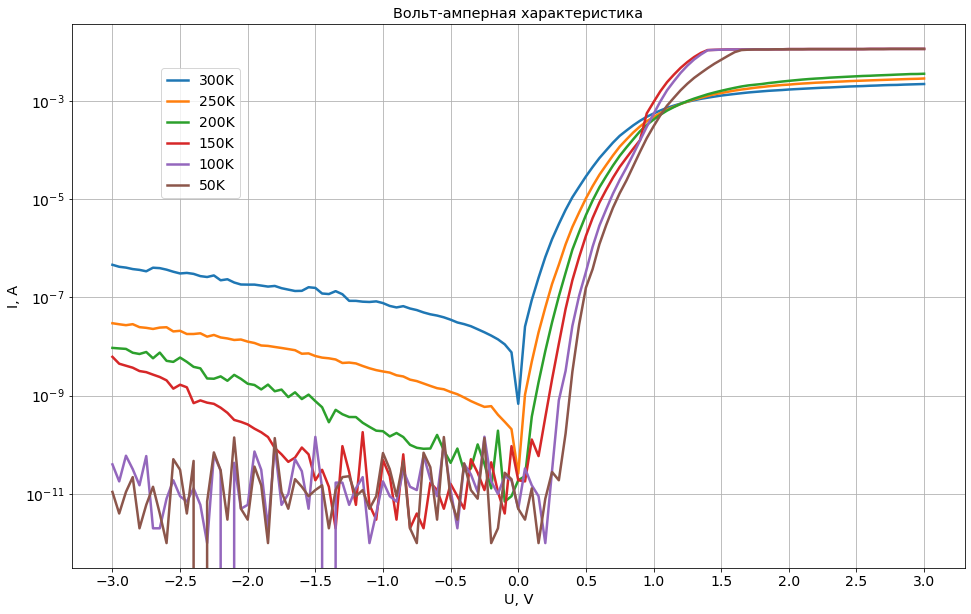

In [6]:
fig, axs = plt.subplots(figsize=(16,10))

axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs = plt.plot(VAC['Bias, V'], VAC['Current_300K'],linewidth=2.5)
# axs = plt.plot(VAC['Bias, V'], VAC['Current_250K_1'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_250K_2'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_200K_1'],linewidth=2.5)
# axs = plt.plot(VAC['Bias, V'], VAC['Current_200K_2'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_150K_1'],linewidth=2.5)
# axs = plt.plot(VAC['Bias, V'], VAC['Current_150K_2'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_100K'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_50K'],linewidth=2.5)
# axs = plt.plot(VAC['Bias, V'], VAC['Current_100K_h'],linewidth=2.5)
# axs = plt.plot(VAC['Bias, V'], VAC['Current_200K_h'],linewidth=2.5)

plt.yscale('log')

plt.title('Вольт-амперная характеристика', fontsize='x-large')
plt.legend(('300K', '250K', '200K',  '150K',  '100K', '50K'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('U, V',fontsize='x-large')
plt.ylabel('I, A',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()
# plt.savefig('VAC_all_Temps.png')

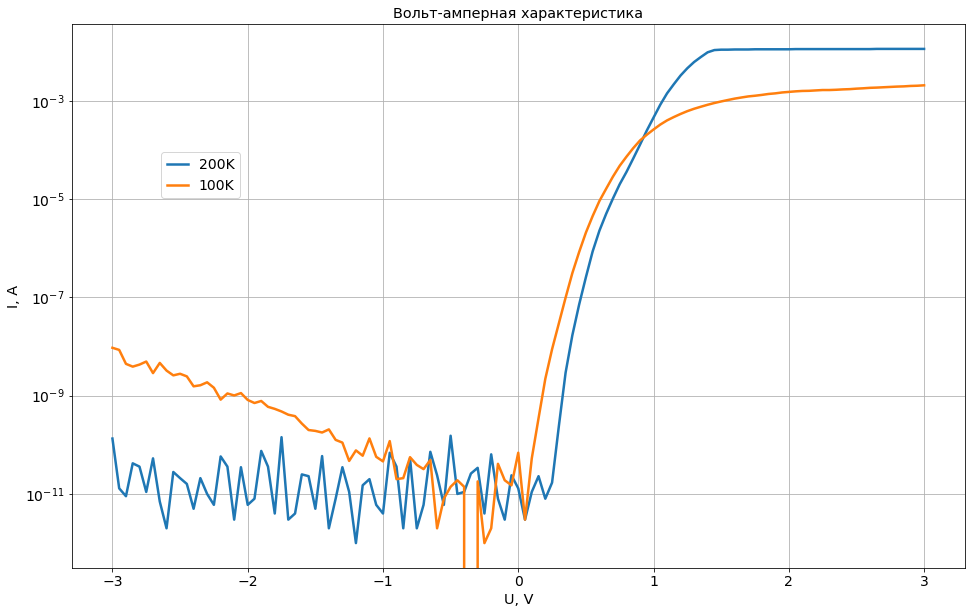

In [7]:
fig, axs = plt.subplots(figsize=(16,10))
axs = plt.plot(VAC['Bias, V'], VAC['Current_100K_h'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_200K_h'],linewidth=2.5)

plt.yscale('log')

plt.title('Вольт-амперная характеристика. Нагрев', fontsize='x-large')
plt.legend(('200K',  '100K'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('U, V',fontsize='x-large')
plt.ylabel('I, A',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()
# plt.savefig('VAC_heating.png')

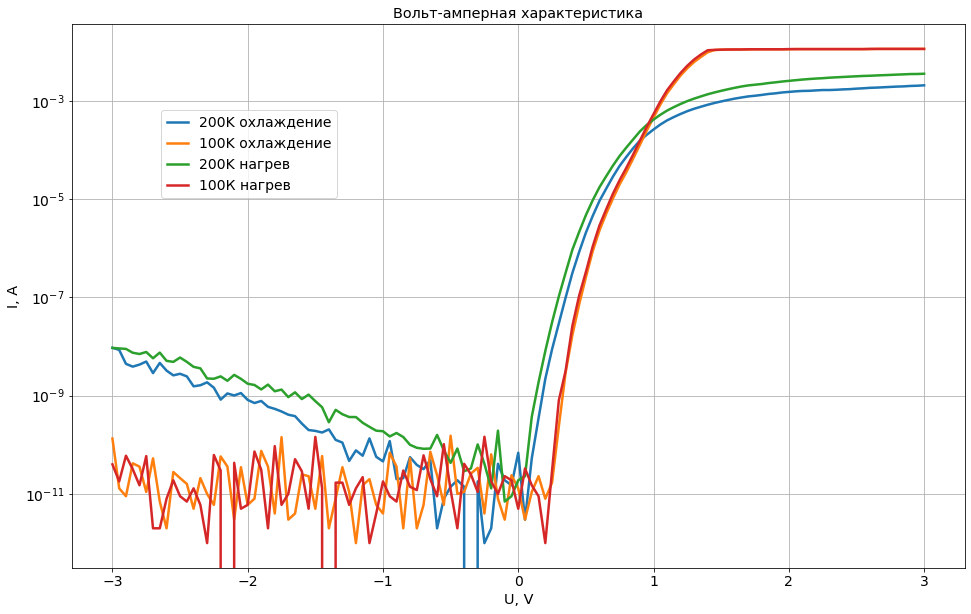

In [81]:
fig, axs = plt.subplots(figsize=(16,10))
axs = plt.plot(VAC['Bias, V'], VAC['Current_200K_h'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_100K_h'],linewidth=2.5)

axs = plt.plot(VAC['Bias, V'], VAC['Current_200K_1'],linewidth=2.5)
axs = plt.plot(VAC['Bias, V'], VAC['Current_100K'],linewidth=2.5)


plt.yscale('log')

plt.title('Вольт-амперная характеристика', fontsize='x-large')
plt.legend(('200K охлаждение',  '100K охлаждение', '200K нагрев', '100К нагрев'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('U, V',fontsize='x-large')
plt.ylabel('I, A',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()
plt.savefig('VAC_comparison.png')

In [9]:
data_300K.head()

,Bias,Capacity_1K,Conductivity_1K,Capacity_10K,Conductivity_10K,Capacity_100K,Conductivity_100K,Capacity_1M,Conductivity_1M
0,-3.000,8.561618e-10,0.000605,8.730995e-11,0.000609,1.693394e-11,0.000607,1.165965e-11,0.000622
1,-2.985,1.383910e-09,0.000586,8.320448e-11,0.000603,1.676762e-11,0.000603,1.162560e-11,0.000614
2,-2.970,5.712257e-10,0.000589,3.671002e-11,0.000601,1.492807e-11,0.000603,1.163421e-11,0.000612
3,-2.955,-1.661104e-09,0.000587,1.300496e-10,0.000600,1.609213e-11,0.000601,1.154479e-11,0.000611
4,-2.940,6.530316e-11,0.000599,7.928940e-11,0.000607,1.530347e-11,0.000603,1.155096e-11,0.000612


In [10]:
data_250K['Conductivity_10K'] = pd.to_numeric(data_250K['Conductivity_10K']).abs()
data_250K['Conductivity_1K'] = pd.to_numeric(data_250K['Conductivity_1K']).abs()
# data_250K['Capacity_1K'] = pd.to_numeric(data_250K['Capacity_1K']).abs()
# data_300K['Capacity_1K'] = pd.to_numeric(data_300K['Capacity_1K']).abs()
data_200K['Conductivity_10K'] = pd.to_numeric(data_200K['Conductivity_10K']).abs()
data_200K['Conductivity_100K'] = pd.to_numeric(data_200K['Conductivity_100K']).abs()
# data_200K['Capacity_1K'] = pd.to_numeric(data_200K['Capacity_1K']).abs()
data_100K['Conductivity_10K'] = pd.to_numeric(data_100K['Conductivity_10K']).abs()
data_100K['Conductivity_1K'] = pd.to_numeric(data_100K['Conductivity_1K']).abs()
data_50K['Conductivity_10K'] = pd.to_numeric(data_50K['Conductivity_10K']).abs()
data_50K['Conductivity_1K'] = pd.to_numeric(data_50K['Conductivity_1K']).abs()
data_100K_h['Conductivity_10K'] = pd.to_numeric(data_100K_h['Conductivity_10K']).abs()
data_100K_h['Conductivity_1K'] = pd.to_numeric(data_100K_h['Conductivity_1K']).abs()

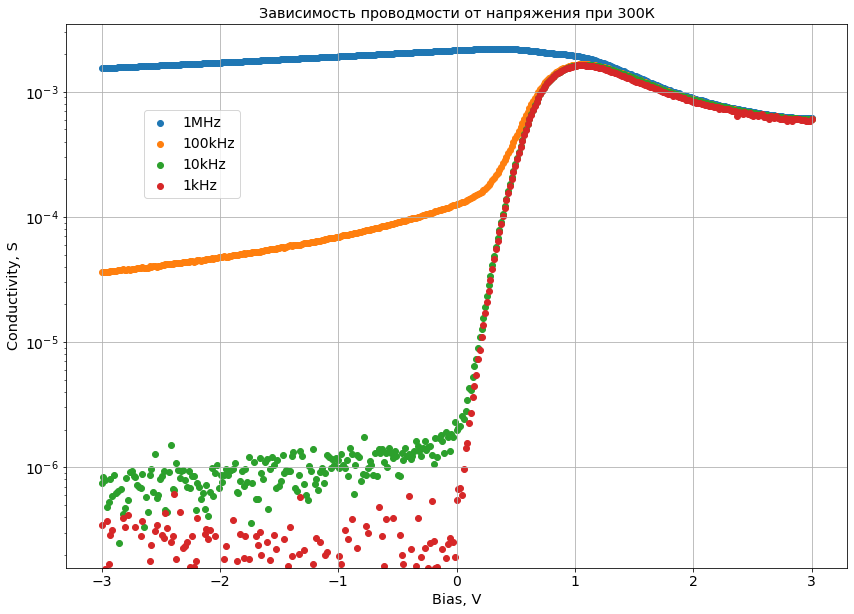

In [75]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=-data_300K['Bias'], y=data_300K['Conductivity_1M'])
axs = scatter(x=-data_300K['Bias'],
              y=data_300K['Conductivity_100K' ])
axs = scatter(x=-data_300K['Bias'],
              y=data_300K['Conductivity_10K' ])
axs = scatter(x=-data_300K['Bias'], y=data_300K['Conductivity_1K'])

plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 300К',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_300K_log.png')

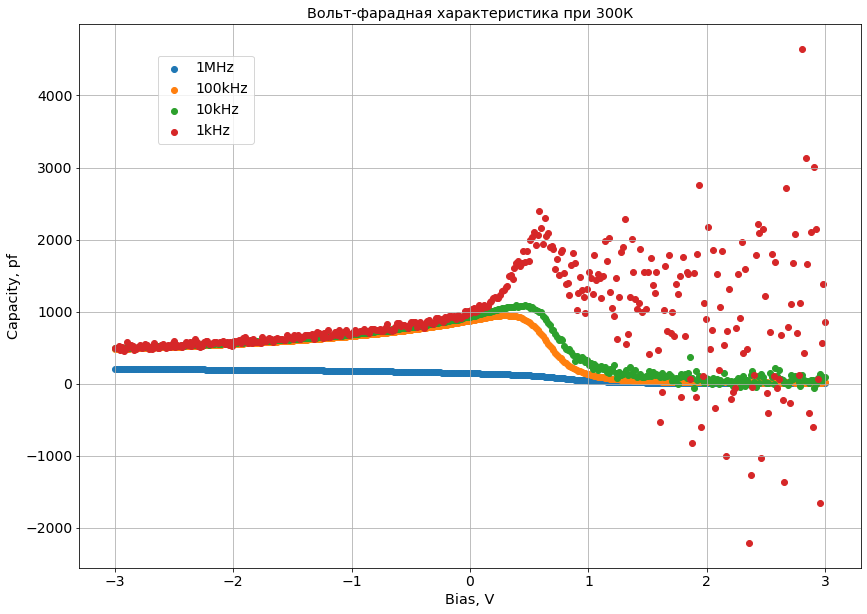

In [76]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=-data_300K['Bias'], y=data_300K['Capacity_1M']*1e12)
axs = scatter(x=-data_300K['Bias'],
              y=data_300K['Capacity_100K' ]*1e12)
axs = scatter(x=-data_300K['Bias'],
              y=data_300K['Capacity_10K' ]*1e12)
axs = scatter(x=-data_300K['Bias'], y=data_300K['Capacity_1K']*1e12)

plt.title('Вольт-фарадная характеристика при 300К', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.78), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_300K.png')

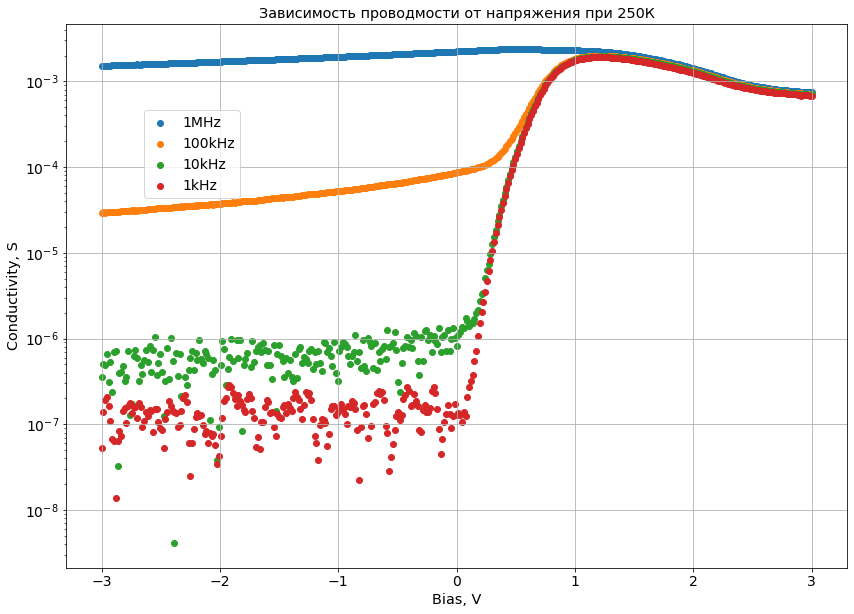

In [77]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=-data_250K['Bias'], y=data_250K['Conductivity_1M'])
axs = scatter(x=-data_250K['Bias'],
              y=data_250K['Conductivity_100K' ])
axs = scatter(x=-data_250K['Bias'],
              y=data_250K['Conductivity_10K' ])
axs = scatter(x=-data_250K['Bias'], y=data_250K['Conductivity_1K'])

plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 250К',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_250K_log.png')

In [14]:
data_250K['Capacity_1K'] = savgol_filter(data_250K['Capacity_1K'],7, 2, mode='interp')
data_250K['Conductivity_1K'] = savgol_filter(data_250K['Conductivity_1K'],7, 2, mode='interp')

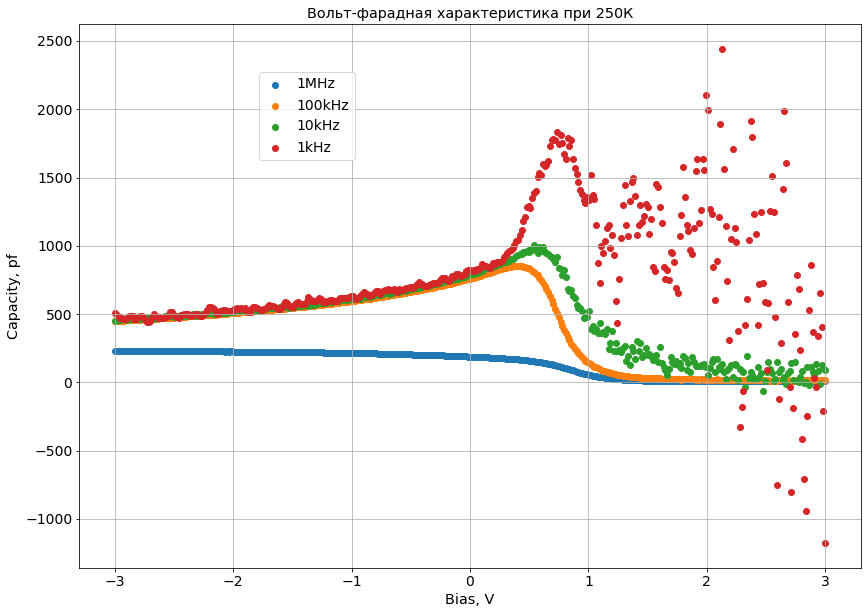

In [78]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=-data_250K['Bias'], y=data_250K['Capacity_1M']*1e12)
axs = scatter(x=-data_250K['Bias'],
              y=data_250K['Capacity_100K' ]*1e12)
axs = scatter(x=-data_250K['Bias'],
              y=data_250K['Capacity_10K' ]*1e12)
axs = scatter(x=-data_250K['Bias'], y=data_250K['Capacity_1K']*1e12)

plt.title('Вольт-фарадная характеристика при 250К', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.23, 0.75), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_250K.png')

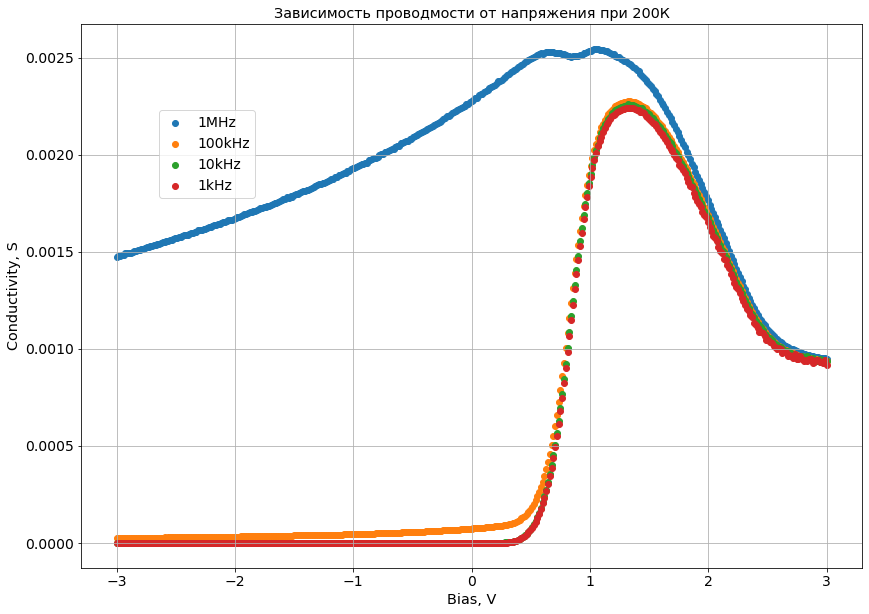

In [16]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_200K['Bias'], y=data_200K['Conductivity_1M'])
axs = scatter(x=data_200K['Bias'],
              y=data_200K['Conductivity_100K' ])
axs = scatter(x=data_200K['Bias'],
              y=data_200K['Conductivity_10K' ])
axs = scatter(x=data_200K['Bias'], y=data_200K['Conductivity_1K'])

# plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 200К',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
# plt.savefig('Conductivity_200K.png')

In [17]:
data_200K['Capacity_1K'] = savgol_filter(data_200K['Capacity_1K'],5, 2, mode='interp')

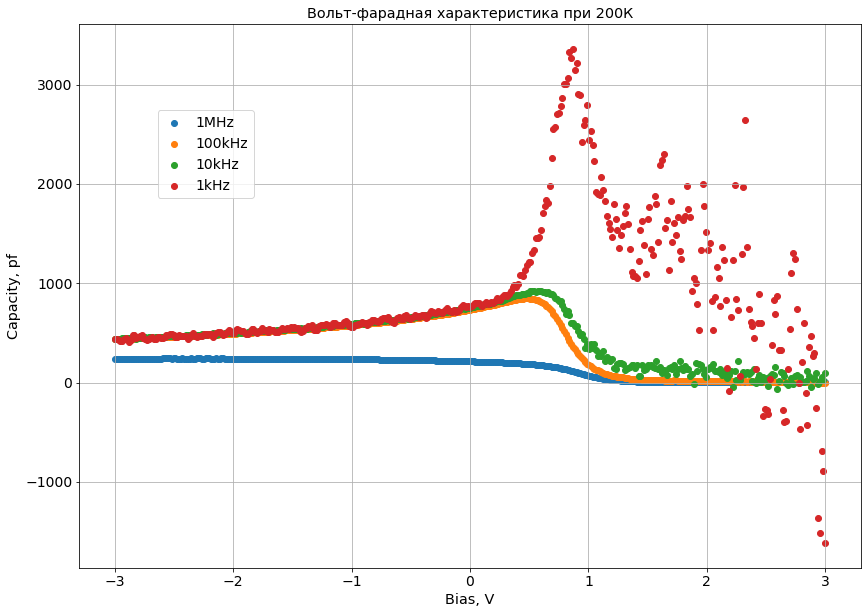

In [69]:
# на 1кГц применен фильтр Савицкого-Голея

fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_200K['Bias'], y=data_200K['Capacity_1M']*1e12)
axs = scatter(x=data_200K['Bias'],
              y=data_200K['Capacity_100K' ]*1e12)
axs = scatter(x=data_200K['Bias'],
              y=data_200K['Capacity_10K' ]*1e12)
axs = scatter(x=data_200K['Bias'], y=data_200K['Capacity_1K']*1e12)

plt.title('Вольт-фарадная характеристика при 200К', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_200K.png')

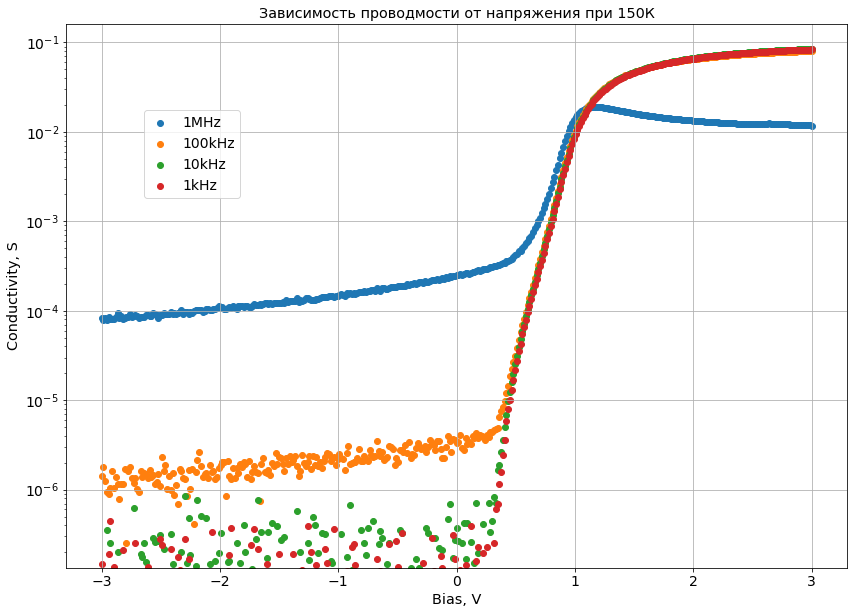

In [67]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_150K['Bias'], y=data_150K['Conductivity_1M'])
axs = scatter(x=data_150K['Bias'],
              y=data_150K['Conductivity_100K' ])
axs = scatter(x=data_150K['Bias'],
              y=data_150K['Conductivity_10K' ])
axs = scatter(x=data_150K['Bias'], y=data_150K['Conductivity_1K'])

plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 150К',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_150K_log.png')

In [20]:
data_150K['Capacity_1K'] = savgol_filter(data_150K['Capacity_1K'],7, 2, mode='interp')

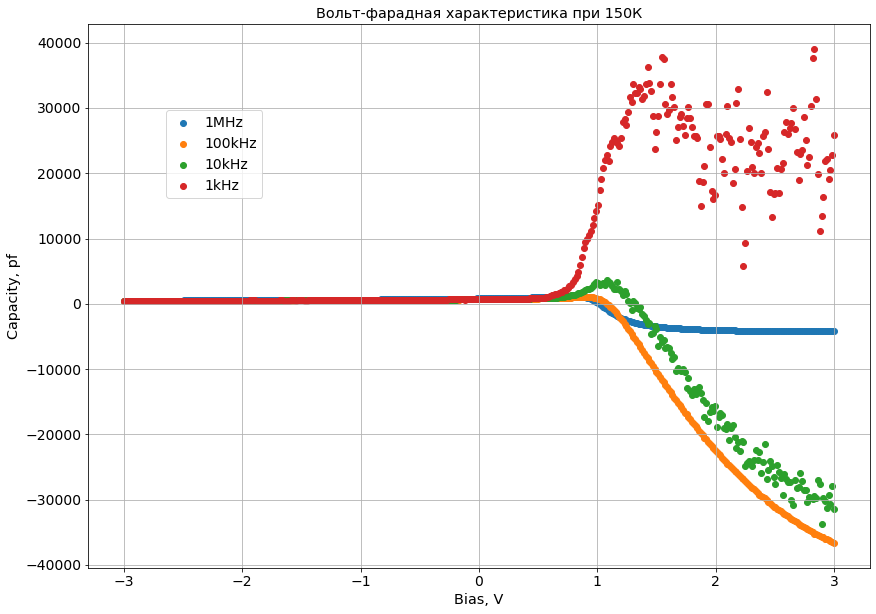

In [66]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_150K['Bias'], y=data_150K['Capacity_1M']*1e12)
axs = scatter(x=data_150K['Bias'],
              y=data_150K['Capacity_100K' ]*1e12)
axs = scatter(x=data_150K['Bias'],
              y=data_150K['Capacity_10K' ]*1e12)
axs = scatter(x=data_150K['Bias'], y=data_150K['Capacity_1K']*1e12)

plt.title('Вольт-фарадная характеристика при 150К', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_150K.png')

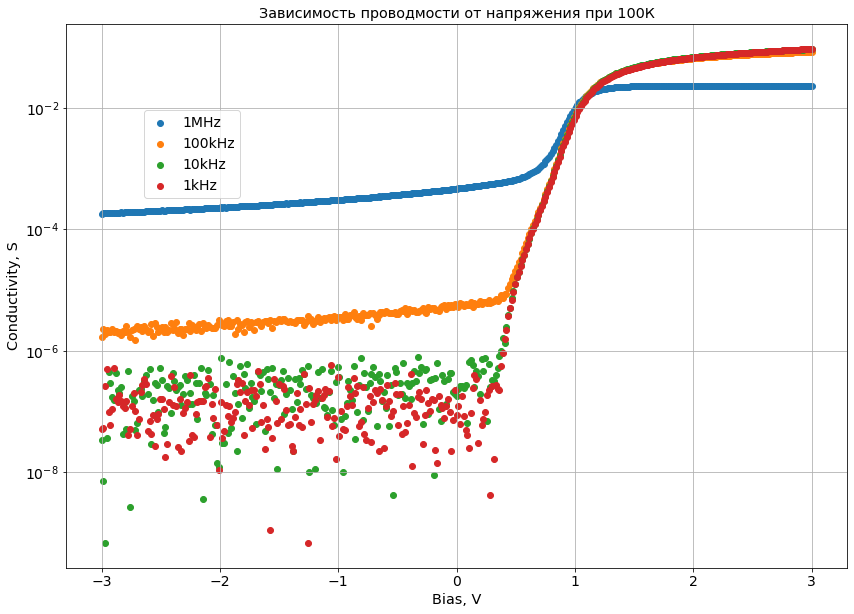

In [22]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_100K['Bias'], y=data_100K['Conductivity_1M'])
axs = scatter(x=data_100K['Bias'],
              y=data_100K['Conductivity_100K' ])
axs = scatter(x=data_100K['Bias'],
              y=data_100K['Conductivity_10K' ])
axs = scatter(x=data_100K['Bias'], y=data_100K['Conductivity_1K'])

plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 100К',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
# plt.savefig('Conductivity_100K_log.png')

In [23]:
data_100K['Capacity_1K'] = savgol_filter(data_100K['Capacity_1K'],7, 2, mode='interp')

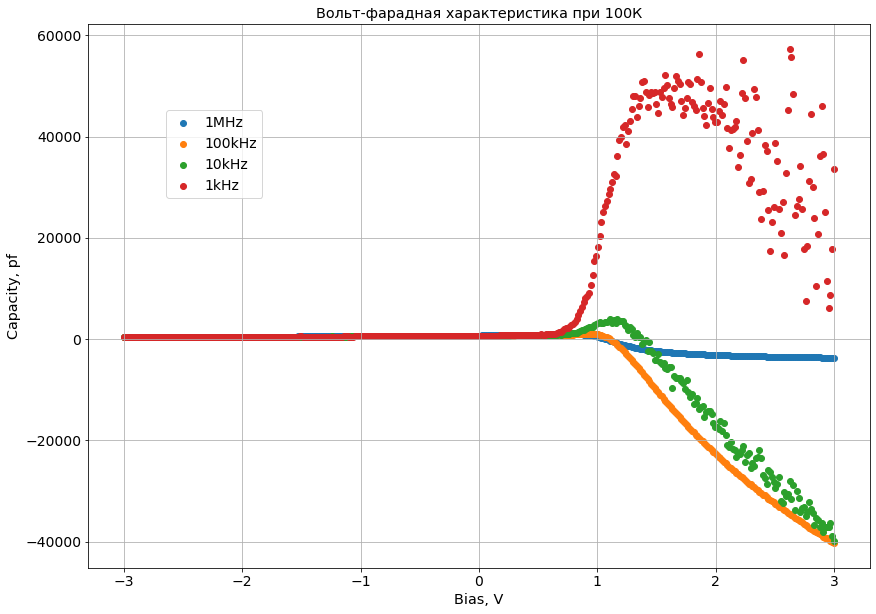

In [65]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_100K['Bias'], y=data_100K['Capacity_1M']*1e12)
axs = scatter(x=data_100K['Bias'],
              y=data_100K['Capacity_100K' ]*1e12)
axs = scatter(x=data_100K['Bias'],
              y=data_100K['Capacity_10K' ]*1e12)
axs = scatter(x=data_100K['Bias'], y=data_100K['Capacity_1K']*1e12)

plt.title('Вольт-фарадная характеристика при 100К', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_100K.png')

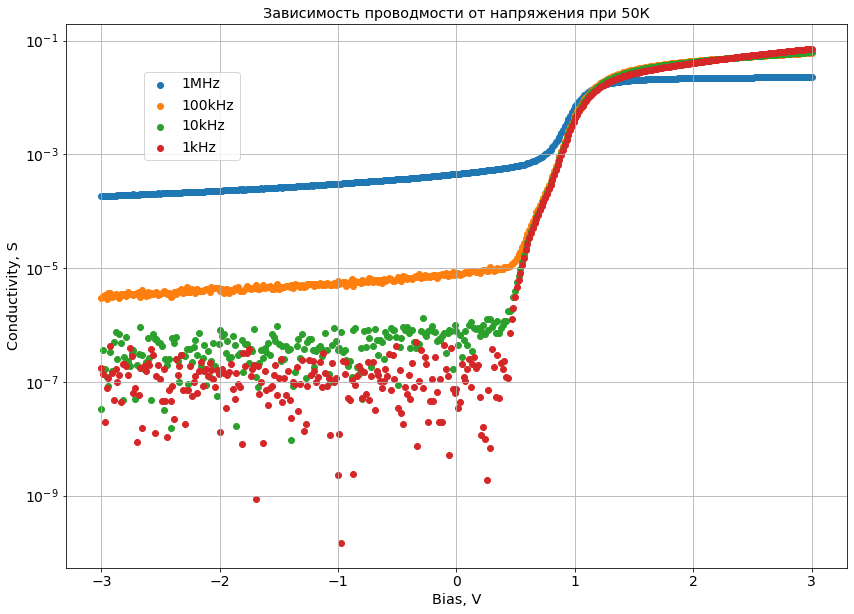

In [64]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_50K['Bias'], y=data_50K['Conductivity_1M'])
axs = scatter(x=data_50K['Bias'],
              y=data_50K['Conductivity_100K' ])
axs = scatter(x=data_50K['Bias'],
              y=data_50K['Conductivity_10K' ])
axs = scatter(x=data_50K['Bias'], y=data_50K['Conductivity_1K'])

plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 50К',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.75), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_50K_log.png')

In [26]:
data_50K['Capacity_1K'] = savgol_filter(data_50K['Capacity_1K'],7, 2, mode='interp')

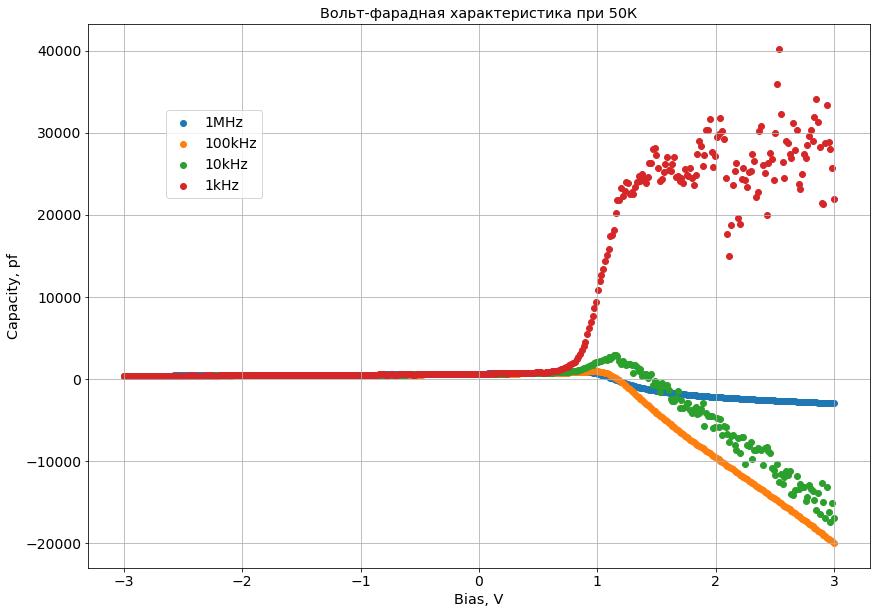

In [61]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_50K['Bias'], y=data_50K['Capacity_1M']*1e12)
axs = scatter(x=data_50K['Bias'],
              y=data_50K['Capacity_100K' ]*1e12)
axs = scatter(x=data_50K['Bias'],
              y=data_50K['Capacity_10K' ]*1e12)
axs = scatter(x=data_50K['Bias'], y=data_50K['Capacity_1K']*1e12)

plt.title('Вольт-фарадная характеристика при 50К', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_50K.png')

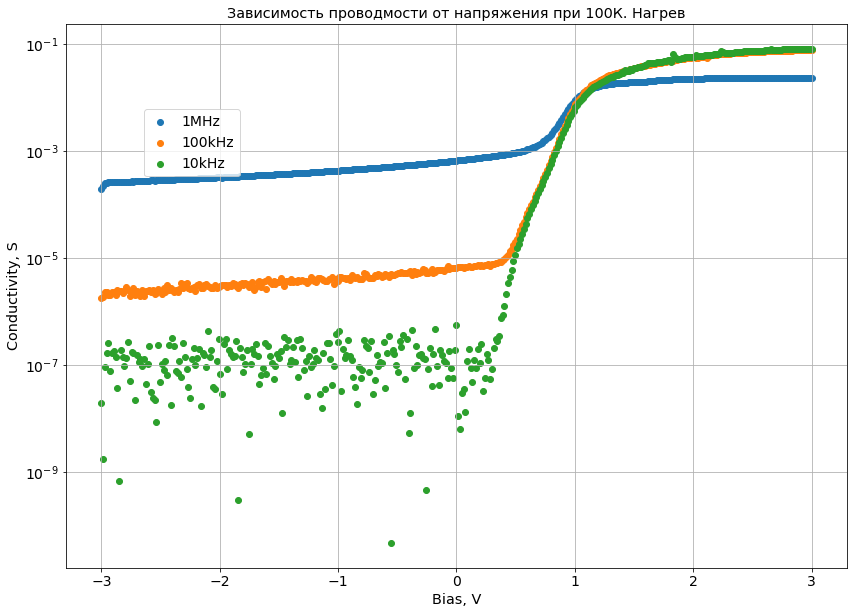

In [60]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_100K_h['Bias'], y=data_100K_h['Conductivity_1M'])
axs = scatter(x=data_100K_h['Bias'],
              y=data_100K_h['Conductivity_100K' ])
# axs = scatter(x=data_100K_h['Bias'],
#               y=data_100K_h['Conductivity_10K' ])
axs = scatter(x=data_100K_h['Bias'], y=data_100K_h['Conductivity_1K'])

plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 100К. Нагрев',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.72), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_100K_h_log.png')

In [38]:
data_100K_h['Capacity_1K'] = savgol_filter(data_100K_h['Capacity_1K'],9, 4, mode='interp')

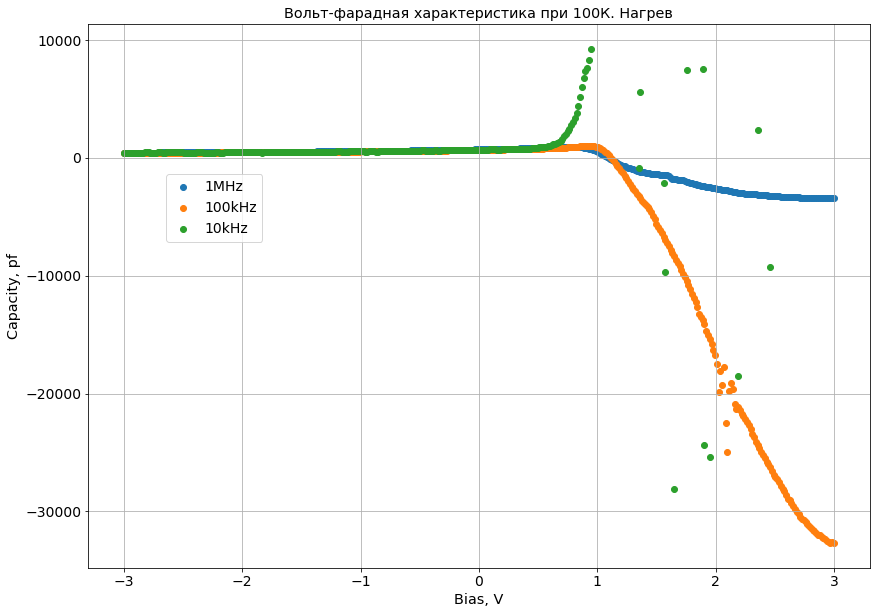

In [59]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_100K_h['Bias'], y=data_100K_h['Capacity_1M']*1e12)
axs = scatter(x=data_100K_h['Bias'],
              y=data_100K_h['Capacity_100K' ]*1e12)
# axs = scatter(x=data_100K_h['Bias'],
#               y=data_100K_h['Capacity_10K' ]*1e12)
axs = scatter(x=data_100K_h['Bias'].loc[(data_100K_h['Capacity_1K']*1e12>-30000)&(data_100K_h['Capacity_1K']*1e12<10000)], 
              y=data_100K_h['Capacity_1K'].loc[(data_100K_h['Capacity_1K']*1e12>-30000)&(data_100K_h['Capacity_1K']*1e12<10000)]*1e12)

plt.title('Вольт-фарадная характеристика при 100К. Нагрев', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.6), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_100K_h.png')

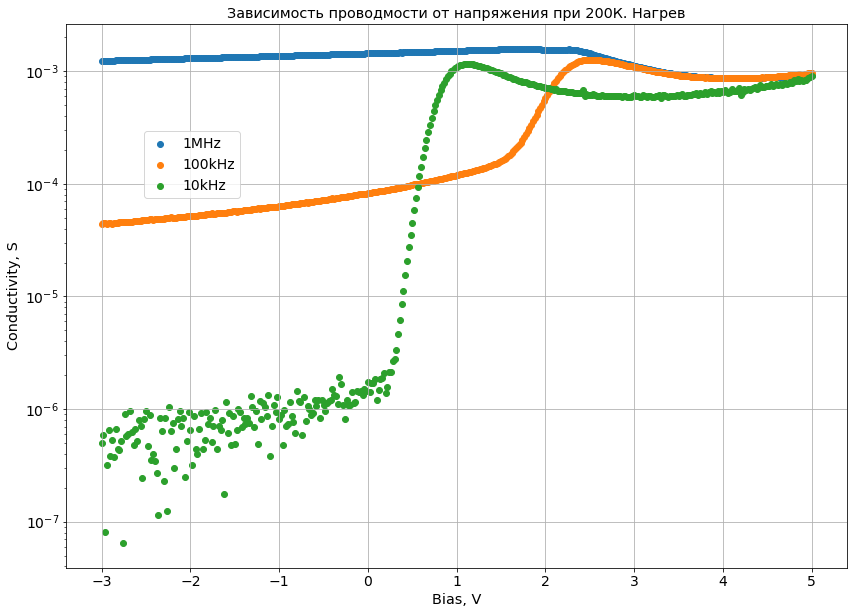

In [35]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Conductivity_1M'])
axs = scatter(x=data_200K_h['Bias'],
              y=data_200K_h['Conductivity_100K' ])
axs = scatter(x=data_200K_h['Bias'],
              y=data_200K_h['Conductivity_10K' ].abs())
# axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Conductivity_1K'])

plt.yscale('log')

plt.title('Зависимость проводмости от напряжения при 200К. Нагрев',fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_200K_h_log.png')

In [32]:
data_200K_h['Capacity_1K'] = savgol_filter(data_200K_h['Capacity_1K'],5, 4, mode='interp')
data_200K_h['Capacity_10K'] = savgol_filter(data_200K_h['Capacity_10K'],5, 4, mode='interp')

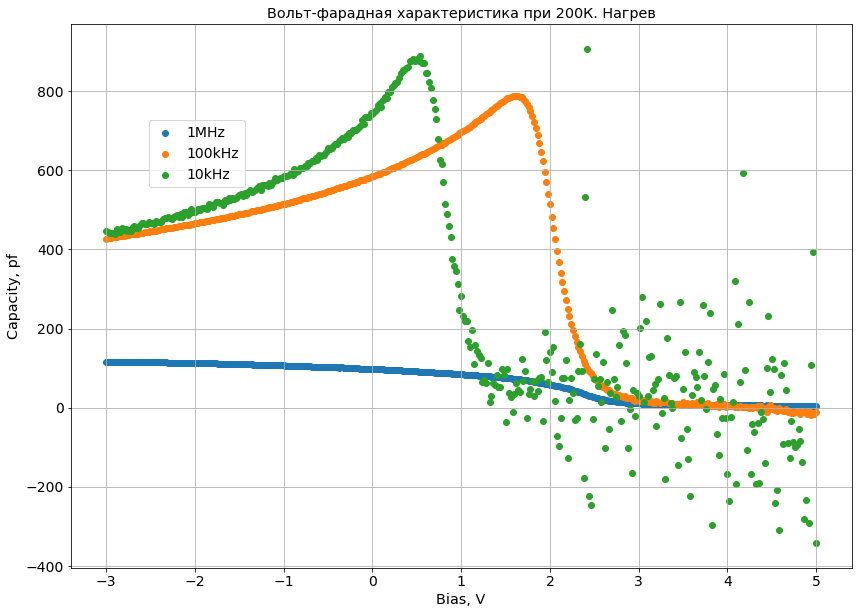

In [58]:
# на 1кГц применен фильтр Савицкого-Голея

fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Capacity_1M']*1e12)
axs = scatter(x=data_200K_h['Bias'],
              y=data_200K_h['Capacity_100K' ]*1e12)
axs = scatter(x=data_200K_h['Bias'].loc[data_200K_h['Capacity_10K']*1e12>-400],
              y=data_200K_h['Capacity_10K'].loc[data_200K_h['Capacity_10K']*1e12>-400]*1e12)
# axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Capacity_1K']*1e12)

plt.title('Вольт-фарадная характеристика при 200К. Нагрев', fontsize='x-large')
plt.legend(('1MHz', '100kHz', '10kHz', '1kHz'), loc=(0.1, 0.7), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_200K_h.png')

In [34]:
data_200K_h.head()

,Bias,Capacity_1K,Conductivity_1K,Capacity_10K,Conductivity_10K,Capacity_100K,Conductivity_100K,Capacity_1M,Conductivity_1M
0,-3.00,4.462511e-10,5.684704e-07,4.467549e-10,4.981131e-07,4.266187e-10,0.000044,1.148443e-10,0.001234
1,-2.98,4.455915e-10,4.965754e-07,4.432116e-10,5.865099e-07,4.280049e-10,0.000045,1.149733e-10,0.001236
2,-2.96,4.422114e-10,4.051597e-07,4.418148e-10,-8.168884e-08,4.282868e-10,0.000045,1.154048e-10,0.001239
3,-2.94,4.407979e-10,3.846635e-07,4.406920e-10,3.201090e-07,4.299511e-10,0.000044,1.152896e-10,0.001239
4,-2.92,4.419558e-10,7.195163e-07,4.410171e-10,6.512981e-07,4.303662e-10,0.000045,1.154031e-10,0.001241


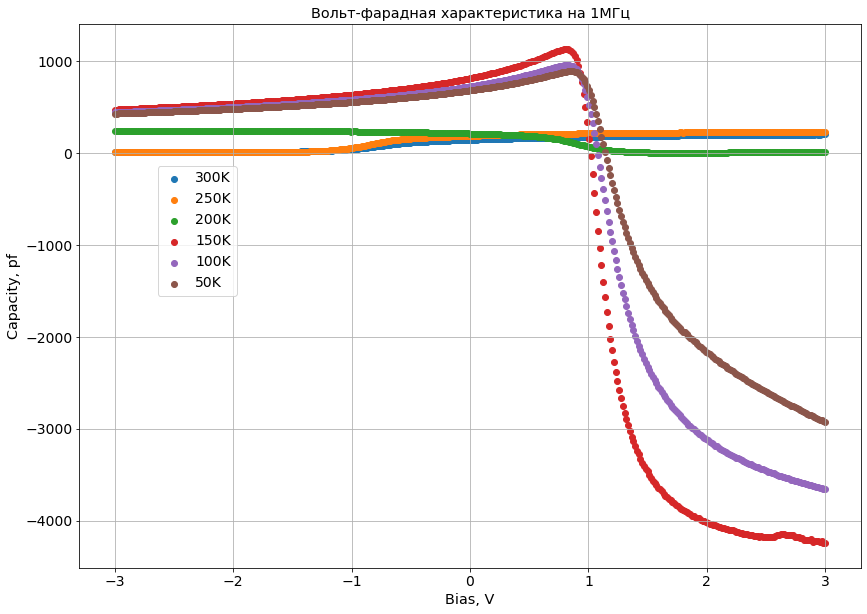

In [49]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Capacity_1M']*1e12)
axs = scatter(x=data_250K['Bias'], y=data_250K['Capacity_1M']*1e12)
axs = scatter(x=data_200K['Bias'], y=data_200K['Capacity_1M']*1e12)
axs = scatter(x=data_150K['Bias'], y=data_150K['Capacity_1M']*1e12)
axs = scatter(x=data_100K['Bias'], y=data_100K['Capacity_1M']*1e12)
axs = scatter(x=data_50K['Bias'], y=data_50K['Capacity_1M']*1e12)


plt.title('Вольт-фарадная характеристика на 1МГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_1MHz.png')

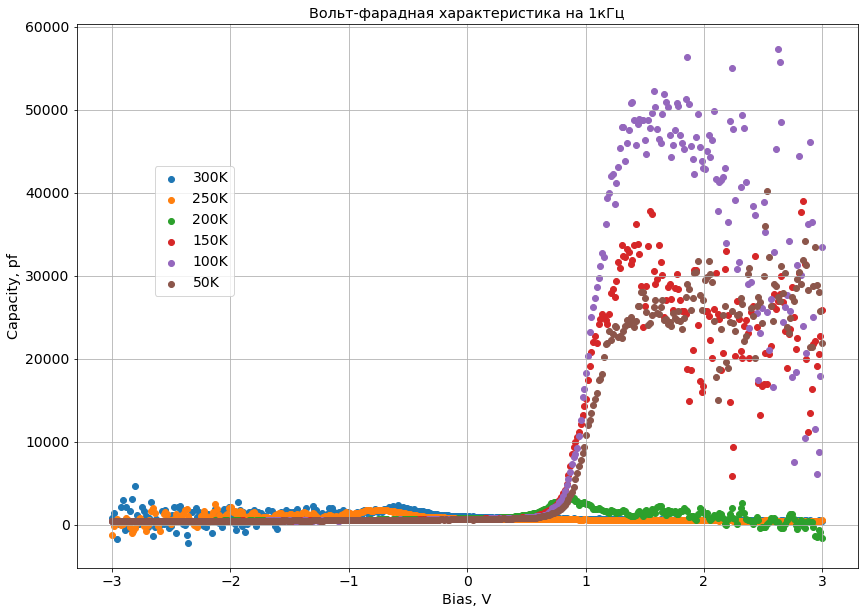

In [50]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Capacity_1K']*1e12)
axs = scatter(x=data_250K['Bias'], y=data_250K['Capacity_1K']*1e12)
axs = scatter(x=data_200K['Bias'], y=data_200K['Capacity_1K']*1e12)
axs = scatter(x=data_150K['Bias'], y=data_150K['Capacity_1K']*1e12)
axs = scatter(x=data_100K['Bias'], y=data_100K['Capacity_1K']*1e12)
axs = scatter(x=data_50K['Bias'], y=data_50K['Capacity_1K']*1e12)


plt.title('Вольт-фарадная характеристика на 1кГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_1kHz.png')

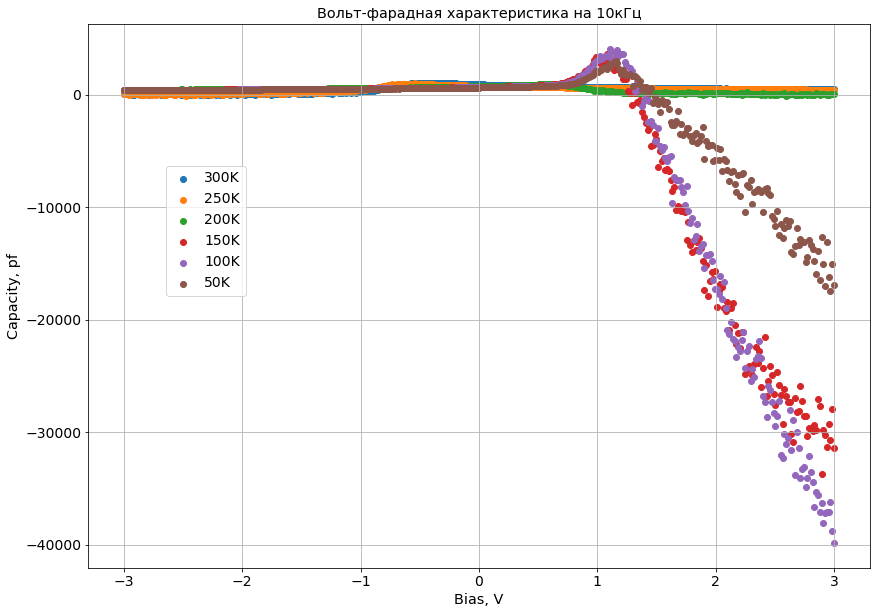

In [51]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Capacity_10K']*1e12)
axs = scatter(x=data_250K['Bias'], y=data_250K['Capacity_10K']*1e12)
axs = scatter(x=data_200K['Bias'], y=data_200K['Capacity_10K']*1e12)
axs = scatter(x=data_150K['Bias'], y=data_150K['Capacity_10K']*1e12)
axs = scatter(x=data_100K['Bias'], y=data_100K['Capacity_10K']*1e12)
axs = scatter(x=data_50K['Bias'], y=data_50K['Capacity_10K']*1e12)


plt.title('Вольт-фарадная характеристика на 10кГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_10kHz.png')

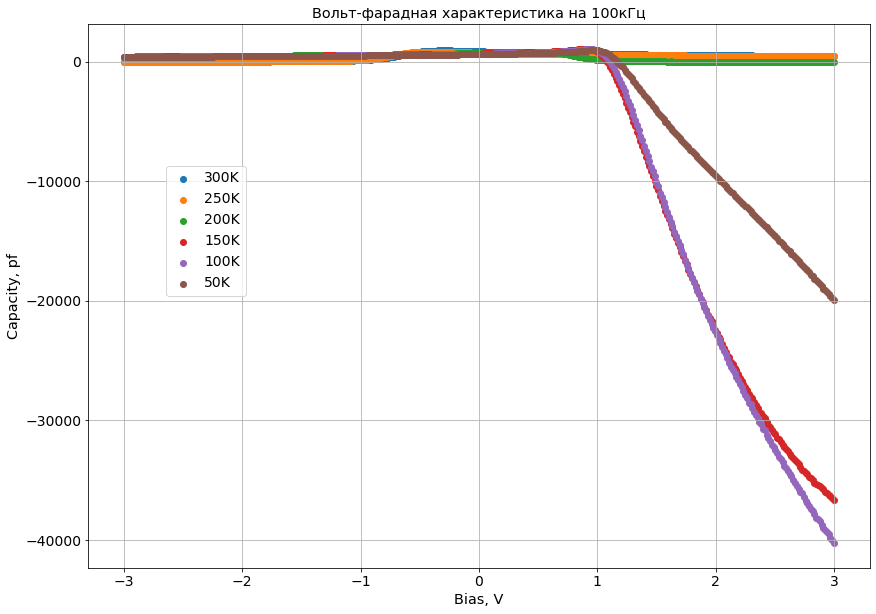

In [52]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Capacity_100K']*1e12)
axs = scatter(x=data_250K['Bias'], y=data_250K['Capacity_100K']*1e12)
axs = scatter(x=data_200K['Bias'], y=data_200K['Capacity_100K']*1e12)
axs = scatter(x=data_150K['Bias'], y=data_150K['Capacity_100K']*1e12)
axs = scatter(x=data_100K['Bias'], y=data_100K['Capacity_100K']*1e12)
axs = scatter(x=data_50K['Bias'], y=data_50K['Capacity_100K']*1e12)


plt.title('Вольт-фарадная характеристика на 100кГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Capacity, pf',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Capacity_100kHz.png')

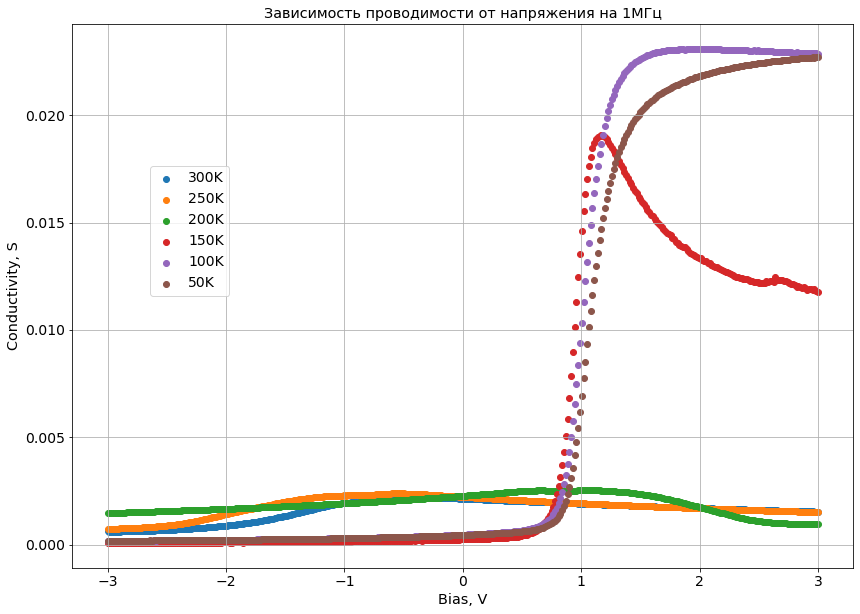

In [80]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Conductivity_1M'])
axs = scatter(x=data_250K['Bias'], y=data_250K['Conductivity_1M'])
axs = scatter(x=data_200K['Bias'], y=data_200K['Conductivity_1M'])
axs = scatter(x=data_150K['Bias'], y=data_150K['Conductivity_1M'])
axs = scatter(x=data_100K['Bias'], y=data_100K['Conductivity_1M'])
axs = scatter(x=data_50K['Bias'], y=data_50K['Conductivity_1M'])


plt.title('Зависимость проводимости от напряжения на 1МГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Conductivity_1MHz.png')

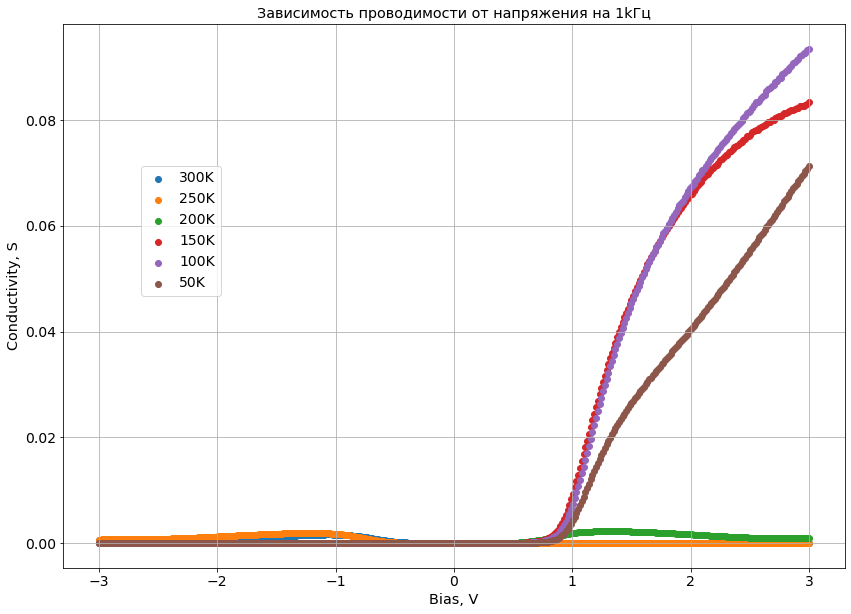

In [79]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Conductivity_1K'])
axs = scatter(x=data_250K['Bias'], y=data_250K['Conductivity_1K'])
axs = scatter(x=data_200K['Bias'], y=data_200K['Conductivity_1K'])
axs = scatter(x=data_150K['Bias'], y=data_150K['Conductivity_1K'])
axs = scatter(x=data_100K['Bias'], y=data_100K['Conductivity_1K'])
axs = scatter(x=data_50K['Bias'], y=data_50K['Conductivity_1K'])


plt.title('Зависимость проводимости от напряжения на 1kГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Conductivity_1kHz.png')

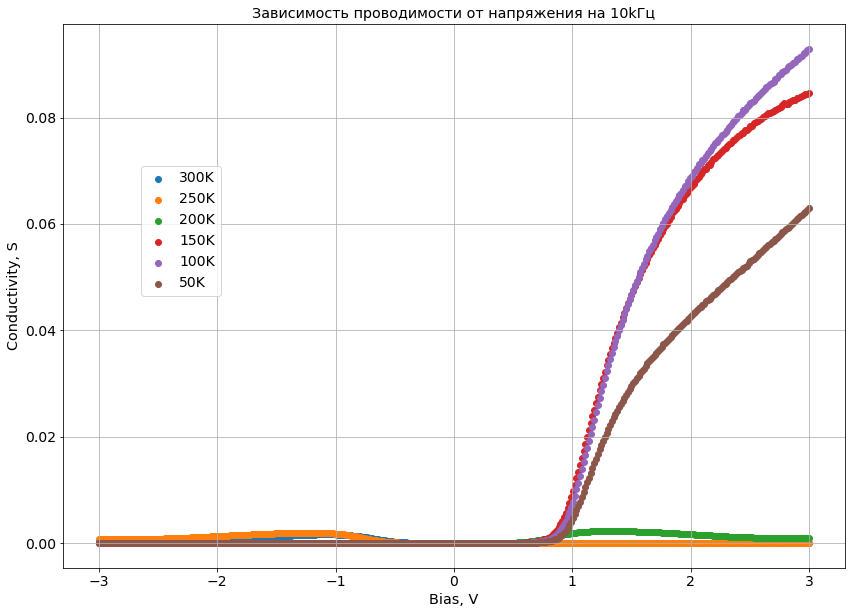

In [107]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Conductivity_10K'])
axs = scatter(x=data_250K['Bias'], y=data_250K['Conductivity_10K'])
axs = scatter(x=data_200K['Bias'], y=data_200K['Conductivity_10K'])
axs = scatter(x=data_150K['Bias'], y=data_150K['Conductivity_10K'])
axs = scatter(x=data_100K['Bias'], y=data_100K['Conductivity_10K'])
axs = scatter(x=data_50K['Bias'], y=data_50K['Conductivity_10K'])


plt.title('Зависимость проводимости от напряжения на 10kГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Conductivity_10kHz.png')

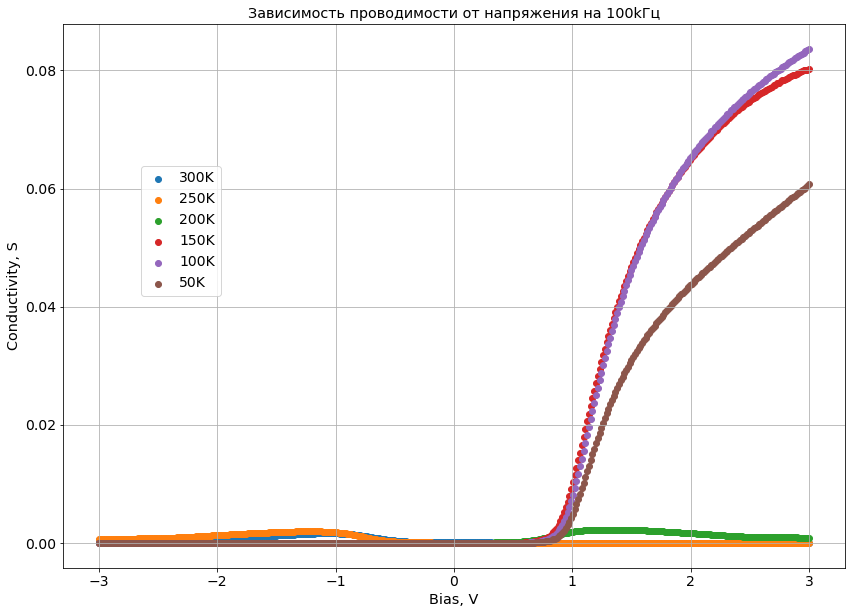

In [108]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_300K['Bias'], y=data_300K['Conductivity_100K'])
axs = scatter(x=data_250K['Bias'], y=data_250K['Conductivity_100K'])
axs = scatter(x=data_200K['Bias'], y=data_200K['Conductivity_100K'])
axs = scatter(x=data_150K['Bias'], y=data_150K['Conductivity_100K'])
axs = scatter(x=data_100K['Bias'], y=data_100K['Conductivity_100K'])
axs = scatter(x=data_50K['Bias'], y=data_50K['Conductivity_100K'])


plt.title('Зависимость проводимости от напряжения на 100kГц', fontsize='x-large')
plt.legend(('300K', '250K', '200K','150K', '100K','50K'), loc=(0.1, 0.50), handlelength=1.5, fontsize=14)

plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

plt.savefig('Conductivity_100kHz.png')

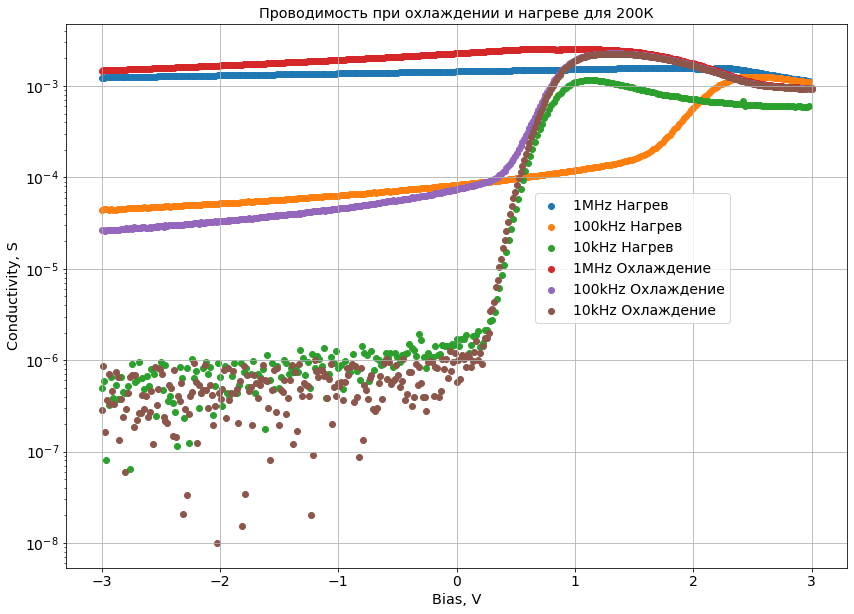

In [91]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_200K_h['Bias'].loc[data_200K_h['Bias']<3], y=data_200K_h['Conductivity_1M'].loc[data_200K_h['Bias']<3])
axs = scatter(x=data_200K_h['Bias'].loc[data_200K_h['Bias']<3],
              y=data_200K_h['Conductivity_100K' ].loc[data_200K_h['Bias']<3])
axs = scatter(x=data_200K_h['Bias'].loc[data_200K_h['Bias']<3],
              y=data_200K_h['Conductivity_10K' ].loc[data_200K_h['Bias']<3].abs())

axs = scatter(x=data_200K['Bias'], y=data_200K['Conductivity_1M'])
axs = scatter(x=data_200K['Bias'],
              y=data_200K['Conductivity_100K' ])
axs = scatter(x=data_200K['Bias'],
              y=data_200K['Conductivity_10K' ].abs())
# axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Conductivity_1K'])

plt.yscale('log')

plt.title('Проводимость при охлаждении и нагреве для 200К',fontsize='x-large')
plt.legend(('1MHz Нагрев', '100kHz Нагрев', '10kHz Нагрев', '1MHz Охлаждение', '100kHz Охлаждение', '10kHz Охлаждение'), loc=(0.6, 0.45), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_200K_comparison_log.png')

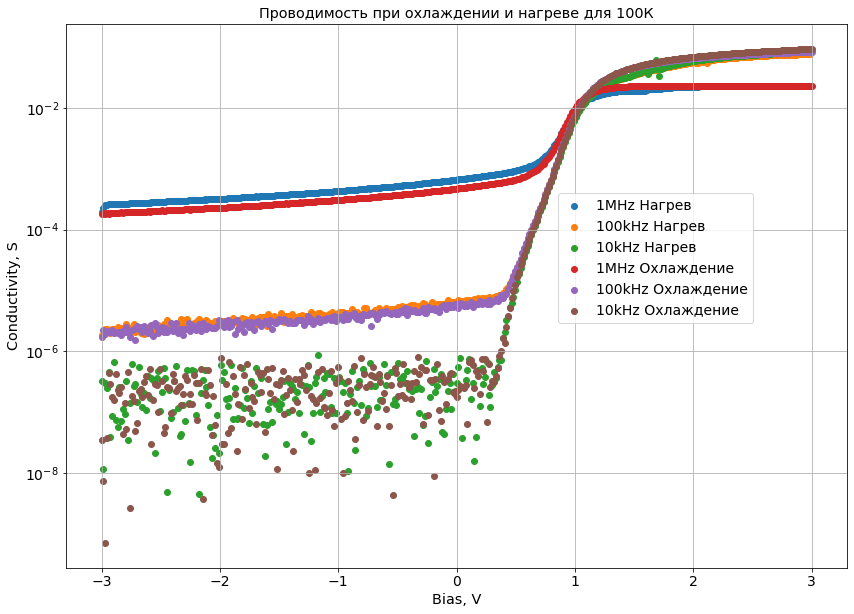

In [93]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_100K_h['Bias'].loc[data_100K_h['Bias']<3], y=data_100K_h['Conductivity_1M'].loc[data_100K_h['Bias']<3])
axs = scatter(x=data_100K_h['Bias'].loc[data_100K_h['Bias']<3],
              y=data_100K_h['Conductivity_100K' ].loc[data_100K_h['Bias']<3])
axs = scatter(x=data_100K_h['Bias'].loc[data_100K_h['Bias']<3],
              y=data_100K_h['Conductivity_10K' ].loc[data_100K_h['Bias']<3].abs())

axs = scatter(x=data_100K['Bias'], y=data_100K['Conductivity_1M'])
axs = scatter(x=data_100K['Bias'],
              y=data_100K['Conductivity_100K' ])
axs = scatter(x=data_100K['Bias'],
              y=data_100K['Conductivity_10K' ].abs())
# axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Conductivity_1K'])

plt.yscale('log')

plt.title('Проводимость при охлаждении и нагреве для 100К',fontsize='x-large')
plt.legend(('1MHz Нагрев', '100kHz Нагрев', '10kHz Нагрев', '1MHz Охлаждение', '100kHz Охлаждение', '10kHz Охлаждение'), loc=(0.63, 0.45), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Conductivity_100K_comparison_log.png')

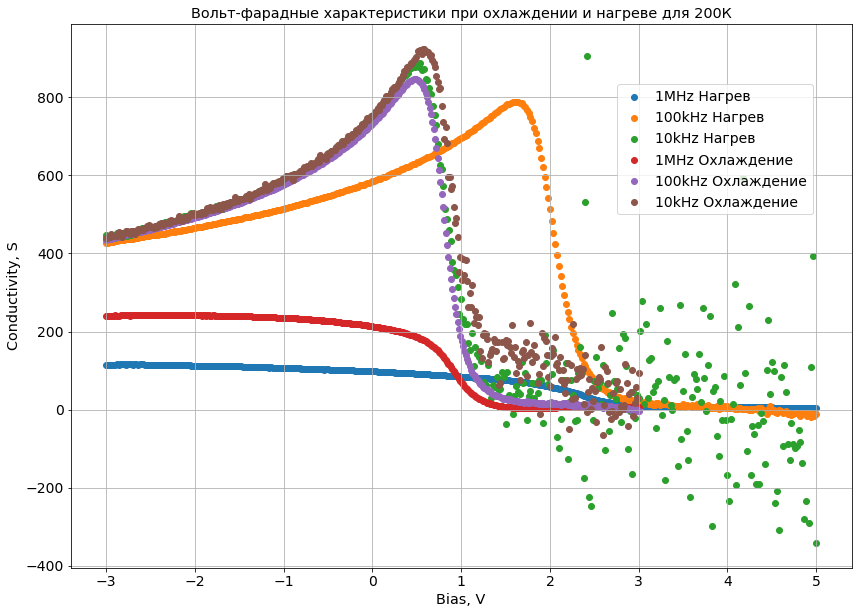

In [106]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Capacity_1M']*1e12)
axs = scatter(x=data_200K_h['Bias'],
              y=data_200K_h['Capacity_100K' ]*1e12)
axs = scatter(x=data_200K_h['Bias'].loc[data_200K_h['Capacity_10K']*1e12>-400],
              y=data_200K_h['Capacity_10K'].loc[data_200K_h['Capacity_10K']*1e12>-400]*1e12)

axs = scatter(x=data_200K['Bias'], y=data_200K['Capacity_1M']*1e12)
axs = scatter(x=data_200K['Bias'],
              y=data_200K['Capacity_100K' ]*1e12)
axs = scatter(x=data_200K['Bias'].loc[data_200K['Capacity_10K']*1e12>-400],
              y=data_200K['Capacity_10K'].loc[data_200K['Capacity_10K']*1e12>-400]*1e12)
# axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Conductivity_1K'])

# plt.yscale('log')

plt.title('Вольт-фарадные характеристики при охлаждении и нагреве для 200К',fontsize='x-large')
plt.legend(('1MHz Нагрев', '100kHz Нагрев', '10kHz Нагрев', '1MHz Охлаждение', '100kHz Охлаждение', '10kHz Охлаждение'), loc=(0.7, 0.65), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Capacity_200K_comparison.png')

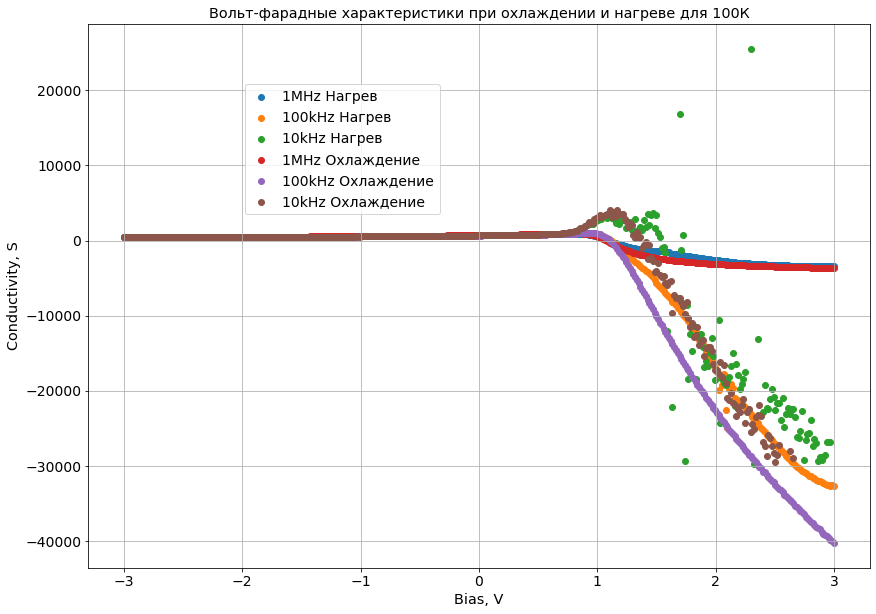

In [105]:
fig, axs = plt.subplots(figsize=(14,10))
axs = scatter(x=data_100K_h['Bias'], y=data_100K_h['Capacity_1M']*1e12)
axs = scatter(x=data_100K_h['Bias'],
              y=data_100K_h['Capacity_100K' ]*1e12)
axs = scatter(x=data_100K_h['Bias'].loc[(data_100K_h['Capacity_10K']*1e12<30000)&(data_100K_h['Capacity_10K']*1e12>-30000)],
              y=data_100K_h['Capacity_10K'].loc[(data_100K_h['Capacity_10K']*1e12<30000)&(data_100K_h['Capacity_10K']*1e12>-30000)]*1e12)

axs = scatter(x=data_100K['Bias'], y=data_100K['Capacity_1M']*1e12)
axs = scatter(x=data_100K['Bias'],
              y=data_100K['Capacity_100K' ]*1e12)
axs = scatter(x=data_100K['Bias'].loc[data_100K['Capacity_10K']*1e12>-30000],
              y=data_100K['Capacity_10K'].loc[data_100K['Capacity_10K']*1e12>-30000]*1e12)
# axs = scatter(x=data_200K_h['Bias'], y=data_200K_h['Conductivity_1K'])

# plt.yscale('log')

plt.title('Вольт-фарадные характеристики при охлаждении и нагреве для 100К',fontsize='x-large')
plt.legend(('1MHz Нагрев', '100kHz Нагрев', '10kHz Нагрев', '1MHz Охлаждение', '100kHz Охлаждение', '10kHz Охлаждение'), loc=(0.2, 0.65), handlelength=1.5, fontsize=14)
plt.xlabel('Bias, V',fontsize='x-large')
plt.ylabel('Conductivity, S',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.grid(ms=10)
plt.savefig('Capacity_100K_comparison.png')